In [8]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat
!pip install yfinance
!pip install bs4
!pip install nbformat

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [12]:
import yfinance as yf
# Download historical data for a stock
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="max")
# Display the downloaded data
tsla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
tasla_data = pd.DataFrame(tsla_data)
tasla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,216.199997,219.869995,213.669998,216.270004,67443500,0.0,0.0
2024-09-10 00:00:00-04:00,220.070007,226.399994,218.639999,226.169998,78891100,0.0,0.0
2024-09-11 00:00:00-04:00,224.550003,228.470001,216.800003,228.130005,83548600,0.0,0.0


In [7]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data
url =' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url)
html_data

<Response [200]>

In [8]:
soup=BeautifulSoup(html_data.content, 'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

In [11]:
# Step 3: Find the relevant table (assuming the table contains "Tesla Quarterly Revenue")
tables = soup.find_all('table')
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        relevant_table = table
        break

if relevant_table is None:
    raise Exception('Relevant table not found')

In [22]:
# Step 4: Extract data and initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
rows = relevant_table.find_all('tr')

for row in rows:
    columns = row.find_all('td')
    if len(columns) >= 2:  # Check if there are at least 2 columns
        date = columns[0].get_text(strip=True)  # First column is Date
        revenue = columns[1].get_text(strip=True)  # Second column is Revenue
        
        # Append the data to the DataFrame
        
        tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True) 
# Step 5: Display the extracted DataFrame
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

In [23]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adeel\AppData\Local\Temp\ipykernel_11396\1877950674.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)


In [24]:
print(tesla_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

In [25]:
#to remove an null or empty strings in the Revenue column.
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [26]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [27]:
import yfinance as yf
# Download historical data for a stock
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
# Display the downloaded data
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [28]:
gme_data.reset_index(inplace=True)

In [29]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [30]:
#Question 4: Use Webscraping to Extract GME Revenue Data
web2 = requests.get(' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html')

In [33]:
soup = BeautifulSoup(web2.content, 'html.parser')
soup

<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

In [34]:
# Step 3: Find the relevant table (assuming the table contains "Tesla Quarterly Revenue")
tables1 = soup.find_all('table')
relevant_table1 = None
for table1 in tables1:
    if "GameStop Quarterly Revenue" in table1.get_text():
        relevant_table1 = table1
        break

if relevant_table1 is None:
    raise Exception('Relevant table not found')

In [35]:
# Step 4: Extract data and initialize a DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
rows = relevant_table.find_all('tr')

for row in rows:
    columns = row.find_all('td')
    if len(columns) >= 2:  # Check if there are at least 2 columns
        date = columns[0].get_text(strip=True)  # First column is Date
        revenue = columns[1].get_text(strip=True)  # Second column is Revenue
        
        # Concatinate the data to the DataFrame
        
        gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True) 
# Step 5: Display the extracted DataFrame
print(gme_revenue)

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

In [36]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adeel\AppData\Local\Temp\ipykernel_11396\1655338250.py:1: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)


In [37]:
print(gme_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

In [38]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [42]:
gme_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


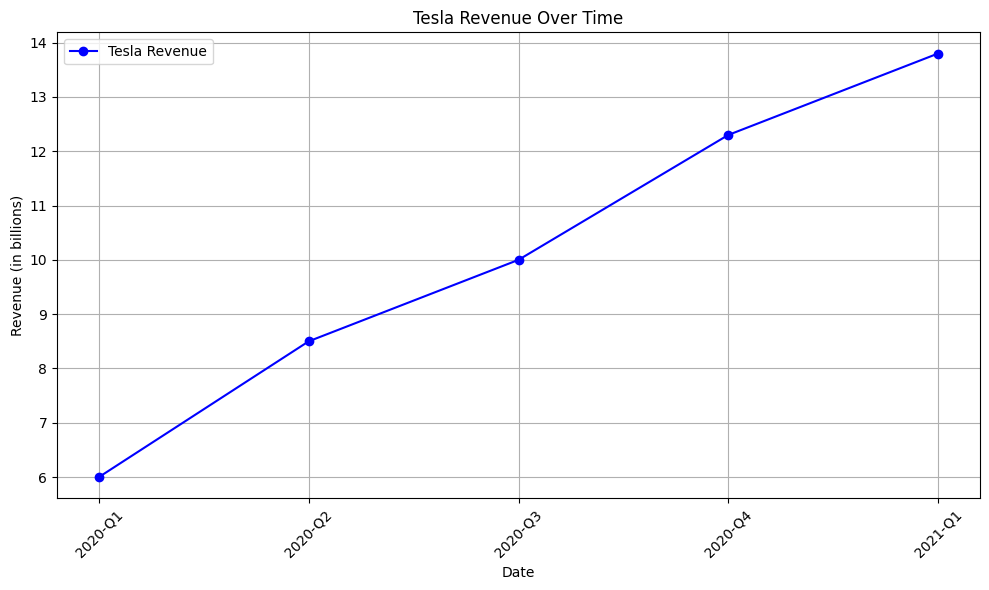

In [51]:
#Question 5: Plot Tesla Stock Graph
#make_graph(tesla_data, tesla_revenue, 'Tesla')

import matplotlib.pyplot as plt

def make_graph(data, revenue, company_name):
    plt.figure(figsize=(10, 6))
    
    # Plotting data
    plt.plot(data, revenue, marker='o', linestyle='-', color='b', label=f'{company_name} Revenue')
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Revenue (in billions)')
    plt.title(f'{company_name} Revenue Over Time')
    plt.legend()
    
    # Show grid
    plt.grid(True)
    
    # Rotate date labels if needed
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Example data
tesla_data = ['2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1']
tesla_revenue = [6.0, 8.5, 10.0, 12.3, 13.8]
make_graph(tesla_data, tesla_revenue, 'Tesla')

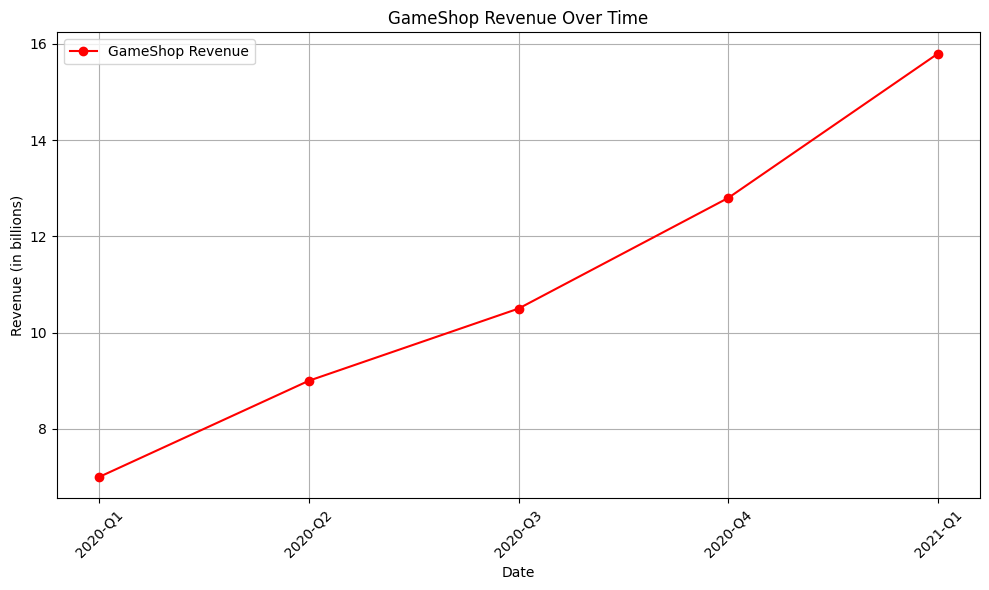

In [53]:
#Question 6: Plot GME Stock Graph
#make_graph(gme_data, gme_revenue, 'GameShop')

import matplotlib.pyplot as plt

def make_graph(data, revenue, company_name):
    plt.figure(figsize=(10, 6))
    
    # Plotting data
    plt.plot(data, revenue, marker='o', linestyle='-', color='r', label=f'{company_name} Revenue')
    
    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Revenue (in billions)')
    plt.title(f'{company_name} Revenue Over Time')
    plt.legend()
    
    # Show grid
    plt.grid(True)
    
    # Rotate date labels if needed
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Example data
gme_data = ['2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1']
gme_revenue = [7.0, 9, 10.5, 12.8, 15.8]
make_graph(gme_data, gme_revenue, 'GameShop')